In [1]:
%pylab inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy, csv
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## North Carolina TRI Data, 1997-2001

In this notebook, we'll be looking at TRI reported releases in North Carolina for the years 1997 through 2001. The three main goals of this notebook are:

    - Explore top releasing facilities in terms of total releases and carcinogenic releases
    - Explore top releasing industry sectors in terms of total releases and carcinogenic releases
    - Visualize on-site releases in NC over this time period using Basemap

#### Top Releasing Facilities
Identifying the facilities in NC that have the highest total, and carcinogenic, releases during this time period will give us an idea of the locations in the state which may be most heavily affected by toxic release.

#### Top Releasing Industry Sectors
Looking at the top releasing industry sectors for NC will be interesting in and of itself, and will let us see if releases in particular sectors are high because of the sector itself or because of the relative density of the industry type in the state of NC. This will be relevant to compare to other states later on.

#### Basemap Visualization
Using Basemap to visualise features of these data in NC will be a good way to think about which features are amenable and relevant to geographical mapping, as opposed to numerical trends that are more naturally represented with charts.

### Importing the TRI Data

In [2]:
# reading in each set of csv data
nc_97 = pd.read_csv('./data/TRI_1997_NC.csv')
nc_98 = pd.read_csv('./data/TRI_1998_NC.csv')
nc_99 = pd.read_csv('./data/TRI_1999_NC.csv')
nc_00 = pd.read_csv('./data/TRI_2000_NC.csv')
nc_01 = pd.read_csv('./data/TRI_2001_NC.csv')

# storing the data in a common array to aggregate for comprehensions, etc
nc_data = [nc_97,nc_98,nc_99,nc_00,nc_01]

# Top Releasing Facilities

## Top Releasing Facilities - Total

In [31]:
#separating out attributes of interest
totalreleases = [yr[['YEAR','FACILITY_NAME','CHEMICAL','TOTAL_RELEASES','LATITUDE','LONGITUDE']] for yr in nc_data]
topten_byyear = [totalreleases[i].sort_values('TOTAL_RELEASES', ascending=False)[0:10] for i in range(len(totalreleases))]
total97, total98, total99, total00, total01 = topten_byyear

In [26]:
#helper function for mapping array of points onto NC map
def mapNClocations(loc_array, maptype='TRI Facilities'):
    latvals = loc_array.LATITUDE.values
    lngvals = loc_array.LONGITUDE.values
    locnames = loc_array.FACILITY_NAME.values
    
    plt.figure(figsize = (20,20))

    nc = Basemap(projection='merc', resolution='h',
                         llcrnrlon = -84.5, urcrnrlon = -75.2,
                         llcrnrlat = 34.0, urcrnrlat = 36.9)

    nc.drawcountries()
    nc.drawstates()
    nc.drawcoastlines()
    nc.drawrivers(linewidth = 1, color='#2471a3')
    nc.fillcontinents(color = '#333333', lake_color='#777777')
    nc.drawmapboundary(fill_color='#777777')


    x, y = nc(lngvals, latvals)
    plt.title("%s" % maptype)
    for label, xpt, ypt in zip(locnames, x, y):
        plt.text(xpt-10000, ypt+5000, label, color='#22dd44')
    nc.scatter(x, y, s=100, c='#214fc1', zorder=10)

### Total Toxic Releases 1997 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES,LATITUDE,LONGITUDE
2512,1997,ELEMENTIS CHROMIUM INC,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,9120298.0,34.372516,-77.859466
1197,1997,PCS PHOSPHATE CO INC,PHOSPHORIC ACID,8391999.0,35.377450,-76.778816
1538,1997,PCS PHOSPHATE CO INC,AMMONIA,3692213.0,35.377450,-76.778816
807,1997,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,3682714.0,34.746500,-78.806100
608,1997,GERDAU LONG STEEL NA-CHARLOTTE MILL,ZINC COMPOUNDS,3292326.0,35.339020,-80.829260
942,1997,BLUE RIDGE PAPER PRODUCTS INC (DBA EVERGREEN P...,METHANOL,1932700.0,35.535600,-82.841900
281,1997,SHURTAPE TECHNOLOGIES LLC - HICKORY TAPE PLANT,TOLUENE,1864554.0,35.738000,-81.309000
1065,1997,INTERNATIONAL PAPER RIEGELWOOD MILL,METHANOL,1571000.0,34.352200,-78.212500
2266,1997,DOMTAR PAPER CO LLC-PLYMOUTH MILL,METHANOL,1480000.0,35.861716,-76.779683
107,1997,RAILROAD FRICTION PRODUCTS CORP,N-HEXANE,1120000.0,34.762788,-79.370238


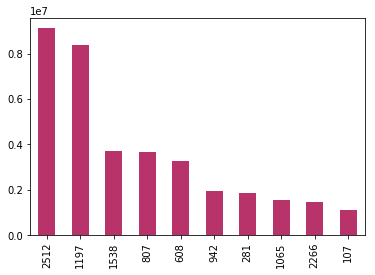

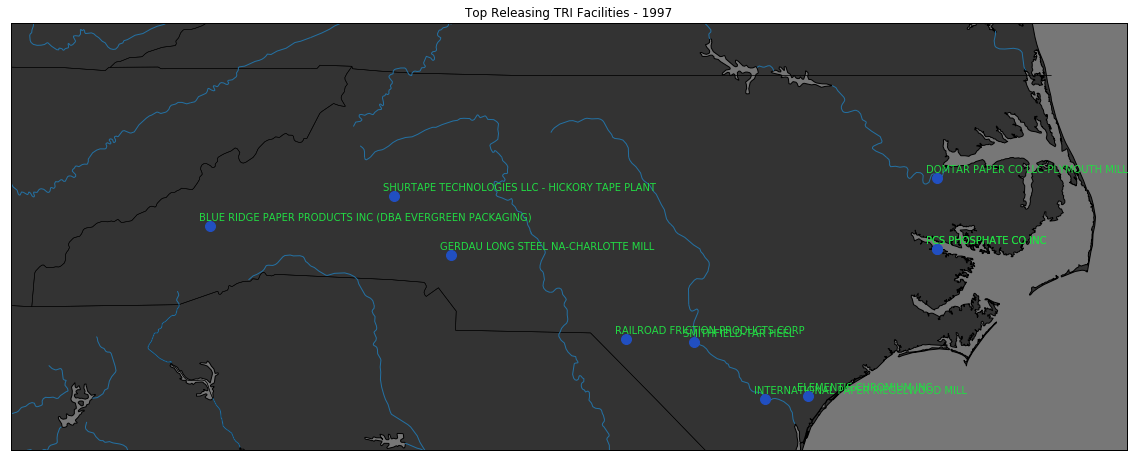

In [32]:
#bar plot top ten
total97['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(total97,'Top Releasing TRI Facilities - 1997')
total97

### Total Toxic Releases 1998 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES,LATITUDE,LONGITUDE
2930,1998,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,14000005.0,36.281338,-80.059438
2660,1998,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,14000000.0,36.483300,-79.073100
682,1998,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,12000005.0,35.597500,-80.965800
2311,1998,ELEMENTIS CHROMIUM INC,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,10019412.0,34.372516,-77.859466
1610,1998,PCS PHOSPHATE CO INC,PHOSPHORIC ACID,7678354.0,35.377450,-76.778816
2912,1998,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4400000.0,36.527800,-78.891700
2664,1998,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,4116033.0,34.746500,-78.806100
1310,1998,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3800005.0,35.190083,-81.008748
1702,1998,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3400005.0,35.217222,-81.761111
1167,1998,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2900000.0,34.283317,-77.985226


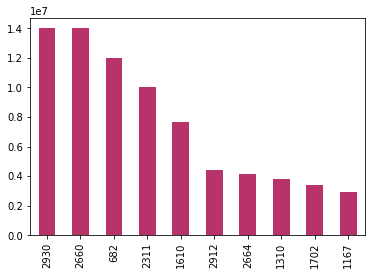

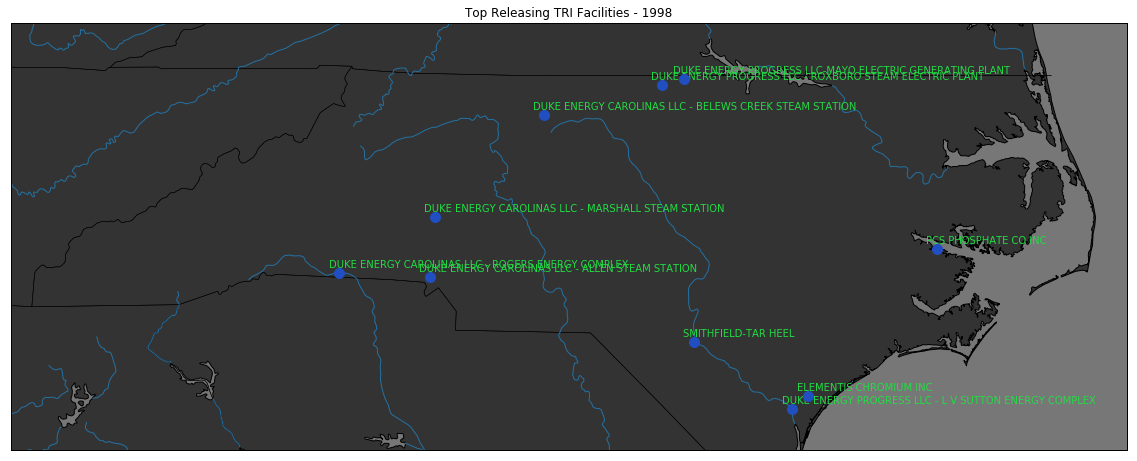

In [34]:
#bar plot top ten
total98['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(total98,'Top Releasing TRI Facilities - 1998')
total98

### Total Toxic Releases 1999 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES,LATITUDE,LONGITUDE
140,1999,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,18000000.0,36.483300,-79.073100
727,1999,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,13000005.0,36.281338,-80.059438
2494,1999,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,11000005.0,35.597500,-80.965800
2080,1999,ELEMENTIS CHROMIUM INC,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,8908356.0,34.372516,-77.859466
1152,1999,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,7400000.0,36.527800,-78.891700
2111,1999,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,5161604.0,34.746500,-78.806100
644,1999,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4800005.0,35.190083,-81.008748
187,1999,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4200000.0,34.283317,-77.985226
772,1999,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3400005.0,35.217222,-81.761111
1364,1999,DUKE ENERGY PROGRESS INC - CAPE FEAR STEAM EL...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2500000.0,35.540928,-78.989750


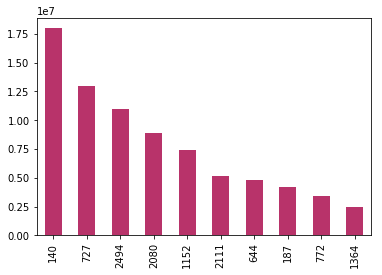

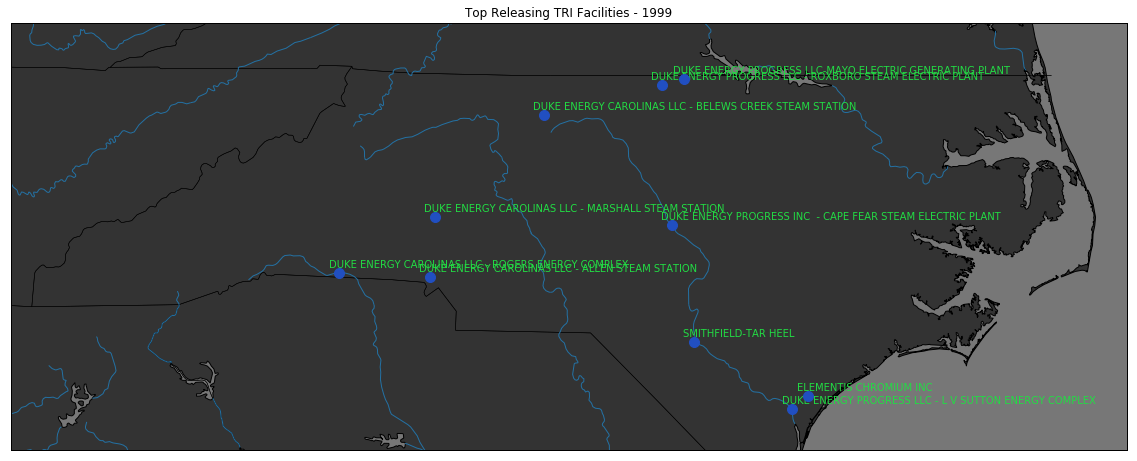

In [35]:
#bar plot top ten
total99['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(total99,'Top Releasing TRI Facilities - 1999')
total99

### Total Toxic Releases 2000 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES,LATITUDE,LONGITUDE
816,2000,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,18000000.0,36.483300,-79.073100
1609,2000,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,13000005.0,35.597500,-80.965800
1687,2000,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,10000005.0,36.281338,-80.059438
358,2000,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,9000000.0,36.527800,-78.891700
1611,2000,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,5300005.0,35.190083,-81.008748
959,2000,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,5129666.0,34.746500,-78.806100
2651,2000,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4200000.0,34.283317,-77.985226
2424,2000,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3800005.0,35.217222,-81.761111
419,2000,DUKE ENERGY PROGRESS INC - CAPE FEAR STEAM EL...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2700000.0,35.540928,-78.989750
78,2000,DUKE ENERGY PROGRESS LLC - H F LEE ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2400000.0,35.379910,-78.087688


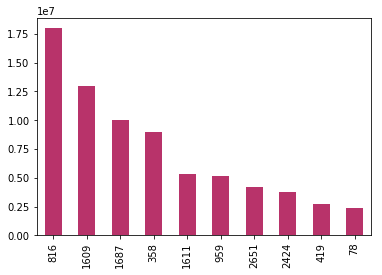

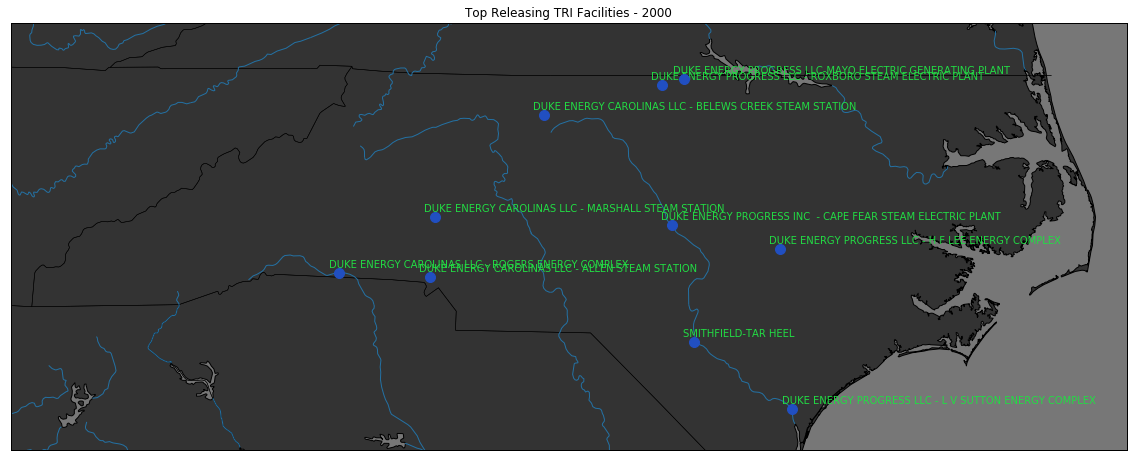

In [36]:
#bar plot top ten
total00['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(total00,'Top Releasing TRI Facilities - 2000')
total00

### Total Toxic Releases 2001 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES,LATITUDE,LONGITUDE
728,2001,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,18000000.0,36.483300,-79.073100
1463,2001,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,11000000.0,36.281338,-80.059438
1004,2001,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,10000000.0,35.597500,-80.965800
253,2001,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,8300000.0,36.527800,-78.891700
2661,2001,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,6288692.0,34.746500,-78.806100
1393,2001,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4600000.0,35.190083,-81.008748
370,2001,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4000000.0,34.283317,-77.985226
2689,2001,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3200000.0,35.217222,-81.761111
151,2001,DUKE ENERGY PROGRESS INC - CAPE FEAR STEAM EL...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2400000.0,35.540928,-78.989750
2280,2001,DUKE ENERGY PROGRESS LLC - H F LEE ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2400000.0,35.379910,-78.087688


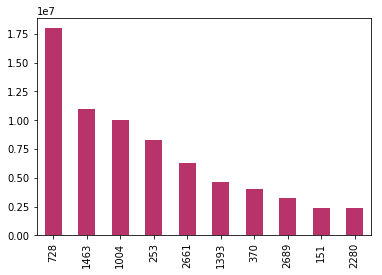

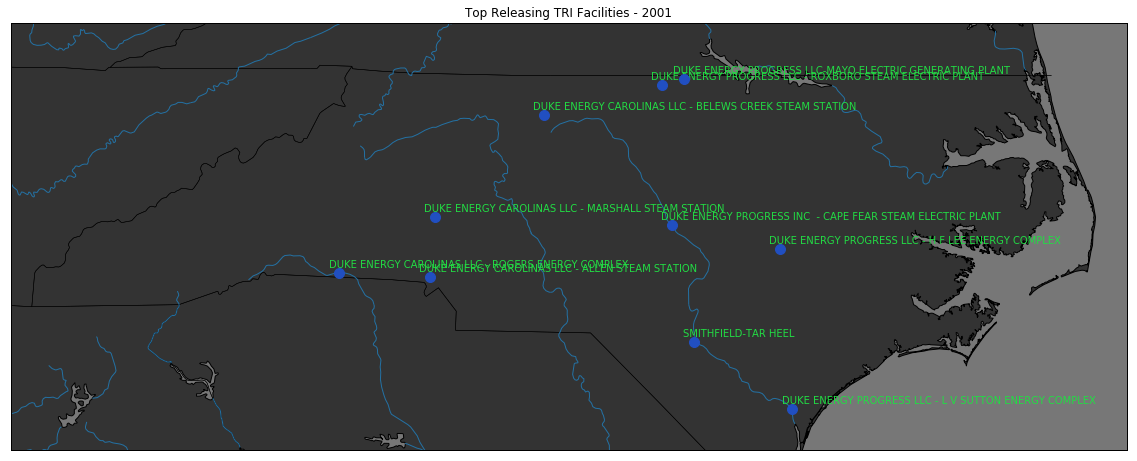

In [37]:
#bar plot top ten
total01['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(total01,'Top Releasing TRI Facilities - 2001')
total01

### Observations - Top Releasing Facilities - Total

Clearly, something happened between 1997-98, where Duke Energy began to dominate the top emissions. It would be interesting to dig more into why this is. Perhaps Duke didn't report until 1998, those facilities didn't operate before that, or something about their processes changed? It also appears that the total output among the highest releasing facilities skyrocketed around that time.

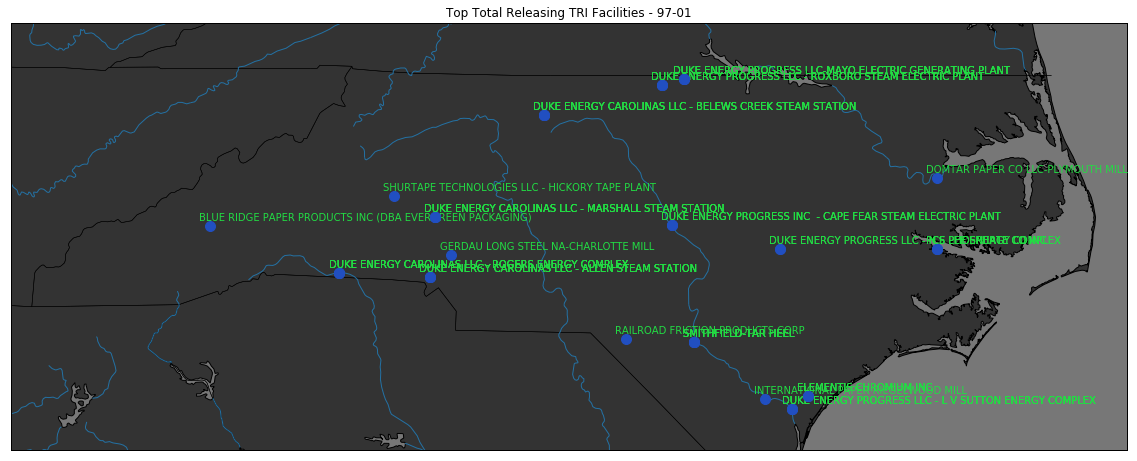

In [40]:
alltotals = pd.concat(topten_byyear)

mapNClocations(alltotals,'Top Total Releasing TRI Facilities - 97-01')

## Top Releasing Facilities - Carcinogens

In [42]:
carcReleases = [yr[['YEAR','FACILITY_NAME','CHEMICAL','CARCINOGEN','TOTAL_RELEASES','LATITUDE','LONGITUDE']] for yr in nc_data]
topTenCarcinogens = [carcReleases[i][carcReleases[i].CARCINOGEN =='YES'].sort_values('TOTAL_RELEASES',ascending=False)[0:10] for i in range(len(carcReleases))]
car97, car98, car99, car00, car01 = topTenCarcinogens

### Carcinogenic Toxic Releases 1997 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES,LATITUDE,LONGITUDE
835,1997,BARNHARDT MANUFACTURING CO NCFI POLYURETHANES DIV,DICHLOROMETHANE,YES,541149.0,36.472778,-80.608611
913,1997,INTERNATIONAL PAPER RIEGELWOOD MILL,CHLOROFORM,YES,475000.0,34.352200,-78.212500
742,1997,FXI INC,DICHLOROMETHANE,YES,433130.0,35.466060,-80.850398
908,1997,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,385008.0,35.918580,-79.999670
1079,1997,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,353029.0,35.288218,-81.013597
1995,1997,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,340168.0,36.006010,-79.780290
1208,1997,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,319102.0,35.600670,-79.046340
644,1997,GRADY WHITE BOATS INC,STYRENE,YES,278585.0,35.649613,-77.344050
1561,1997,DAK AMERICAS LLC CAPE FEAR SITE,ACETALDEHYDE,YES,232876.0,34.322316,-78.039566
534,1997,FOAMEX LP,DICHLOROMETHANE,YES,201213.0,35.705273,-81.186485


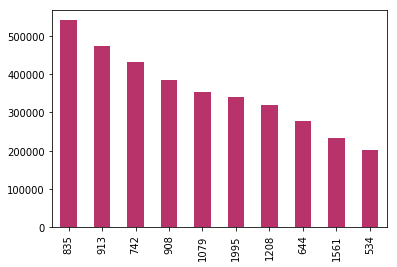

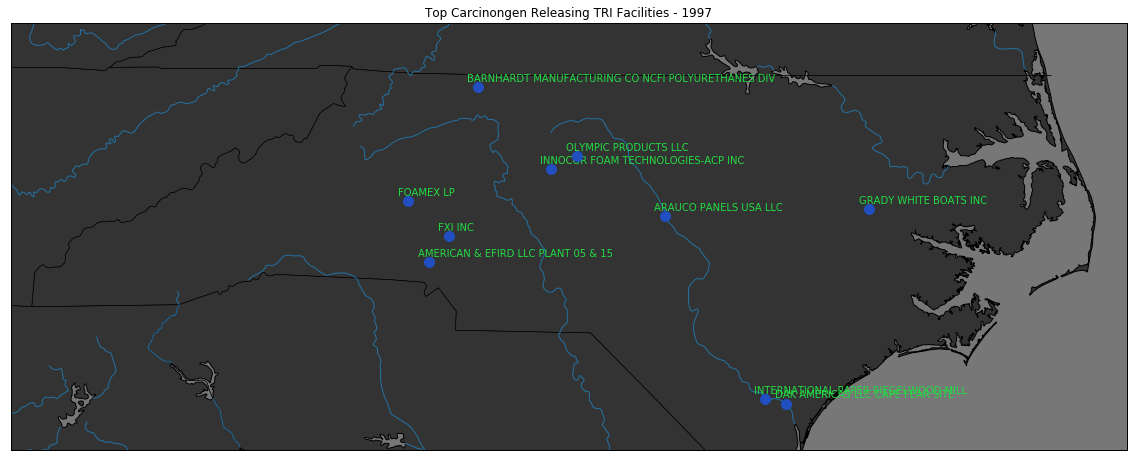

In [44]:
#bar plot top ten
car97['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(car97,'Top Carcinongen Releasing TRI Facilities - 1997')
car97

### Carcinogenic Toxic Releases 1998 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES,LATITUDE,LONGITUDE
2644,1998,BARNHARDT MANUFACTURING CO NCFI POLYURETHANES DIV,DICHLOROMETHANE,YES,507211.0,36.472778,-80.608611
2152,1998,FOAMEX LP,DICHLOROMETHANE,YES,376083.0,35.705273,-81.186485
1297,1998,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,351634.0,36.006010,-79.780290
2555,1998,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,335184.0,35.600670,-79.046340
182,1998,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,322104.0,35.288218,-81.013597
1409,1998,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,314890.0,35.918580,-79.999670
1255,1998,"BATHCRAFT, LLC..",STYRENE,YES,304000.0,35.719580,-77.911720
2415,1998,GRADY WHITE BOATS INC,STYRENE,YES,294199.0,35.649613,-77.344050
1222,1998,INTERNATIONAL PAPER RIEGELWOOD MILL,CHLOROFORM,YES,273303.0,34.352200,-78.212500
813,1998,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,258390.0,35.277350,-80.871630


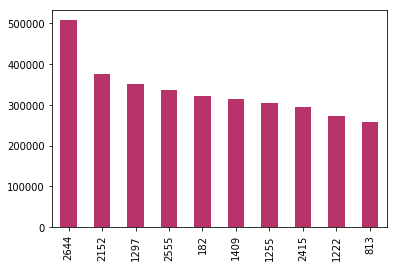

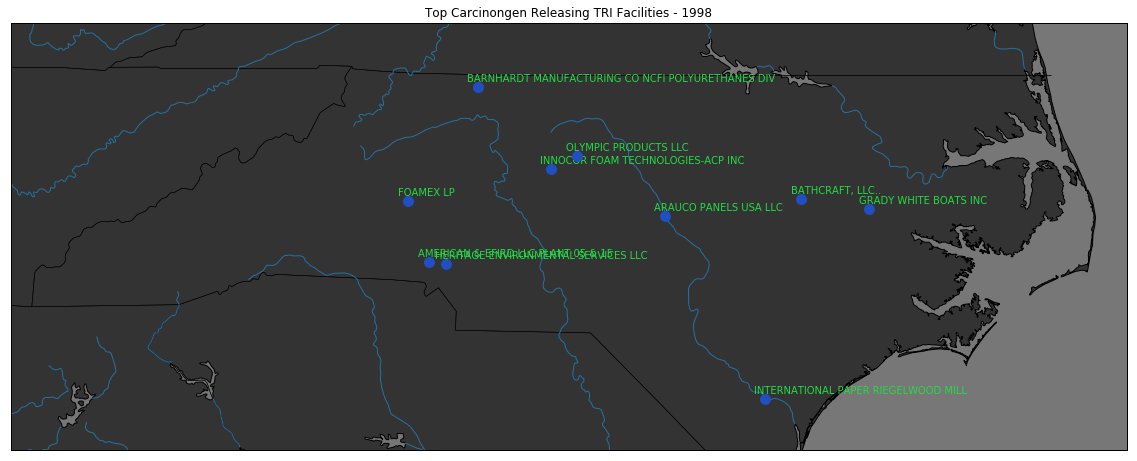

In [45]:
#bar plot top ten
car98['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(car98,'Top Carcinongen Releasing TRI Facilities - 1998')
car98

### Carcinogenic Toxic Releases 1999 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES,LATITUDE,LONGITUDE
791,1999,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,366920.0,36.006010,-79.780290
1763,1999,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,356307.0,35.600670,-79.046340
1951,1999,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,351780.0,35.288218,-81.013597
1071,1999,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,333540.0,35.918580,-79.999670
351,1999,BARNHARDT MANUFACTURING CO NCFI POLYURETHANES DIV,DICHLOROMETHANE,YES,332016.0,36.472778,-80.608611
2292,1999,"BATHCRAFT, LLC..",STYRENE,YES,325157.0,35.719580,-77.911720
2450,1999,GRADY WHITE BOATS INC,STYRENE,YES,275359.0,35.649613,-77.344050
2161,1999,FXI INC,DICHLOROMETHANE,YES,239763.0,35.466060,-80.850398
1435,1999,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,189595.0,35.277350,-80.871630
2220,1999,BLUE RIDGE PAPER PRODUCTS INC (DBA EVERGREEN P...,ACETALDEHYDE,YES,158900.0,35.535600,-82.841900


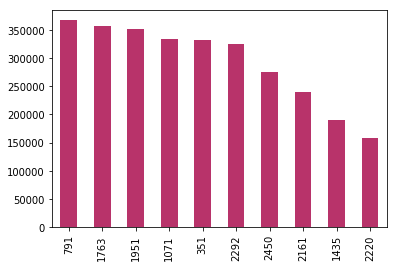

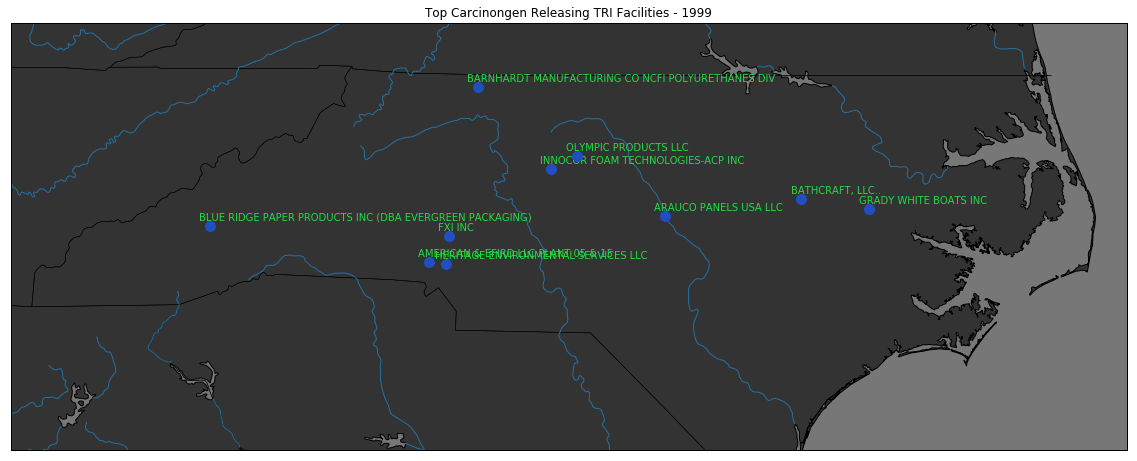

In [46]:
#bar plot top ten
car99['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(car99,'Top Carcinongen Releasing TRI Facilities - 1999')
car99

### Carcinogenic Toxic Releases 2000 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES,LATITUDE,LONGITUDE
1572,2000,FXI INC,DICHLOROMETHANE,YES,374745.0,35.466060,-80.850398
1045,2000,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,349780.0,36.006010,-79.780290
1409,2000,"BATHCRAFT, LLC..",STYRENE,YES,340500.0,35.719580,-77.911720
417,2000,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,328228.0,35.288218,-81.013597
1349,2000,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,314824.0,35.918580,-79.999670
2587,2000,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,309319.0,35.600670,-79.046340
66,2000,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,220635.0,35.277350,-80.871630
2123,2000,GRADY WHITE BOATS INC,STYRENE,YES,211618.0,35.649613,-77.344050
1099,2000,DSM PHARMACEUTICALS INC,DICHLOROMETHANE,YES,207997.0,35.659766,-77.358783
355,2000,RSI HOME PRODUCTS,STYRENE,YES,176539.0,35.486943,-81.242500


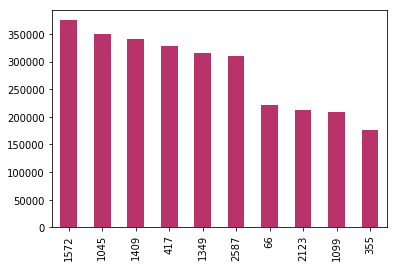

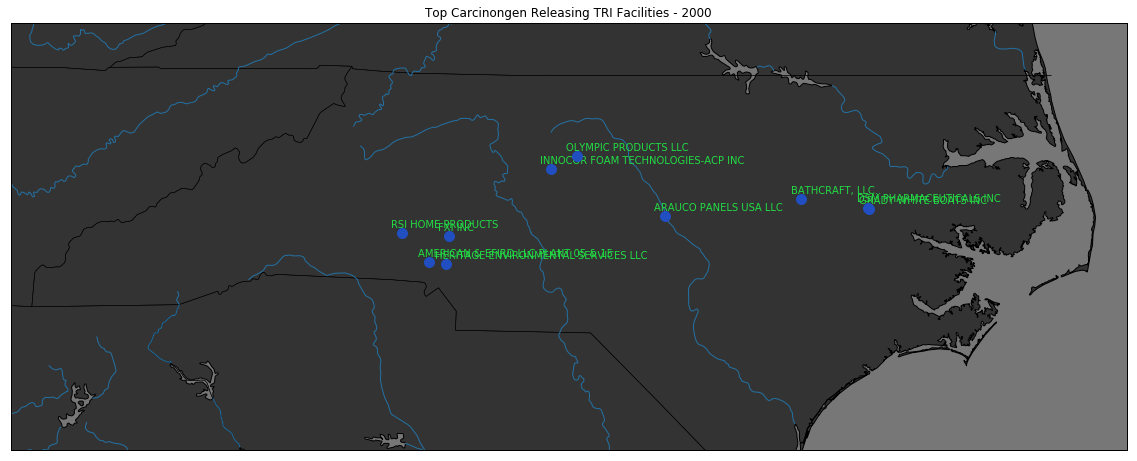

In [47]:
#bar plot top ten
car00['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(car00,'Top Carcinongen Releasing TRI Facilities - 2000')
car00

### Carcinogenic Toxic Releases 2001 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES,LATITUDE,LONGITUDE
1796,2001,"BATHCRAFT, LLC..",STYRENE,YES,372700.0,35.719580,-77.911720
1956,2001,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,324248.0,35.288218,-81.013597
2017,2001,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,266153.0,35.600670,-79.046340
2259,2001,DAK AMERICAS LLC CAPE FEAR SITE,COBALT COMPOUNDS,YES,211296.0,34.322316,-78.039566
62,2001,GRADY WHITE BOATS INC,STYRENE,YES,191158.0,35.649613,-77.344050
2717,2001,WIX FILTRATION CORP - ALLEN PLANT,DI(2-ETHYLHEXYL) PHTHALATE,YES,172650.0,35.276380,-81.222670
450,2001,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,162830.0,35.277350,-80.871630
243,2001,BLUE RIDGE PAPER PRODUCTS INC (DBA EVERGREEN P...,ACETALDEHYDE,YES,158560.0,35.535600,-82.841900
2237,2001,FXI INC,DICHLOROMETHANE,YES,154435.0,35.466060,-80.850398
428,2001,RSI HOME PRODUCTS,STYRENE,YES,148079.0,35.486943,-81.242500


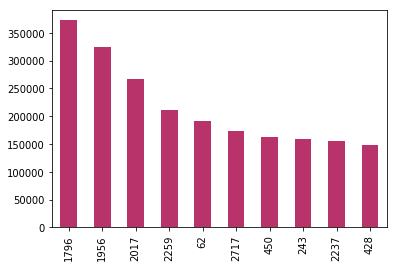

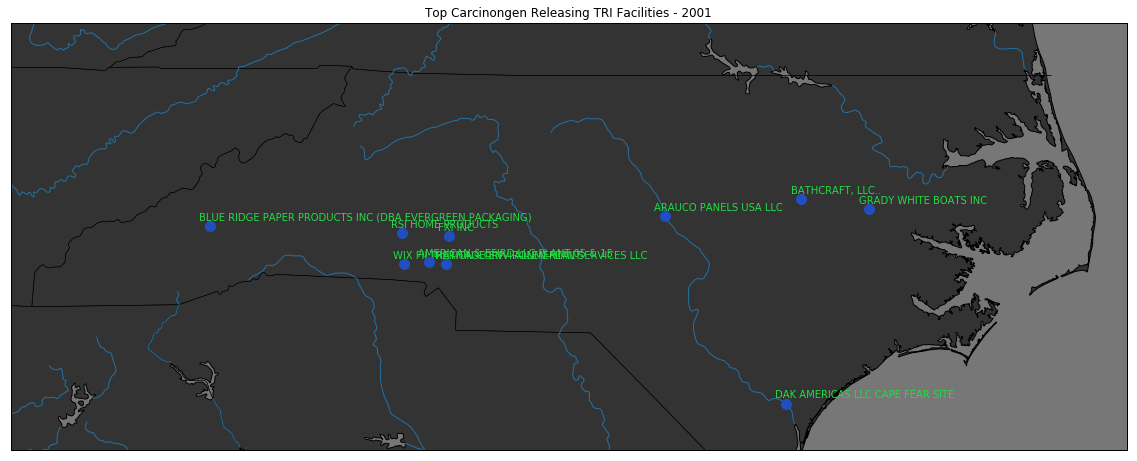

In [48]:
#bar plot top ten
car01['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
#basemap plot facilities
mapNClocations(car01,'Top Carcinongen Releasing TRI Facilities - 2001')
car01

### Observations - Top Releasing Facilities - Carcinogens

One clear difference in the top carcinogen-releasing facilities as compared to the overall top-releasing facilities is the spead of releases within that group. In the top ten, the release numbers are very close, and generally are large amounts of Dichloromethane. It also appears that, in all of the years, most of the carcinogen-releasing facilities are very close to some large metropolitan areas. Particularly, in 2000 and 2001, there are several high-carcinogen-releasing facilities close to Charlotte. It also appears that there are facilities located on or very near to the Neuse river. It may be interesting to look at these facilities and see if the carcinogenic releases there are potentially into water supplies.

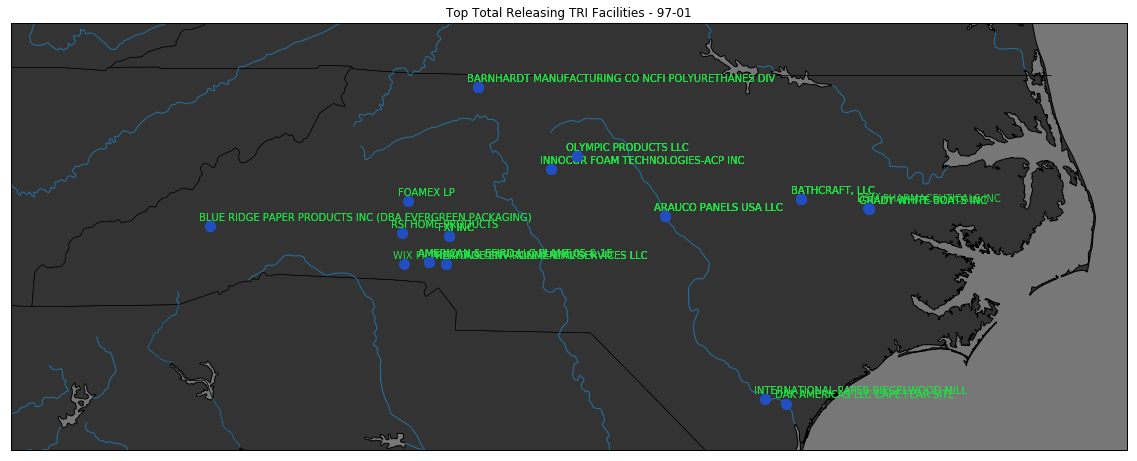

In [50]:
#TODO: figure out a better way to handle label stacking -- these look stupid!
carcinogen_totals = pd.concat(topTenCarcinogens)
mapNClocations(carcinogen_totals,'Top Total Releasing TRI Facilities - 97-01')

# Top Releasing Industry Sectors

In [ ]:
#code, charts and graphs related to top releasing facilities
sectors = [yr[['INDUSTRY_SECTOR', 'CHEMICAL','TOTAL_RELEASES']] for yr in nc_data]
sectors[0].groupby(['INDUSTRY_SECTOR','CHEMICAL']).sum()#.sort_values('TOTAL_RELEASES', ascending=False)

## Basemap Visualization

In [ ]:
#code and Basemap visualizations